In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use("fivethirtyeight")

sns.set_style({'font.sans-serif':['simhei','Arial']})

%matplotlib inline

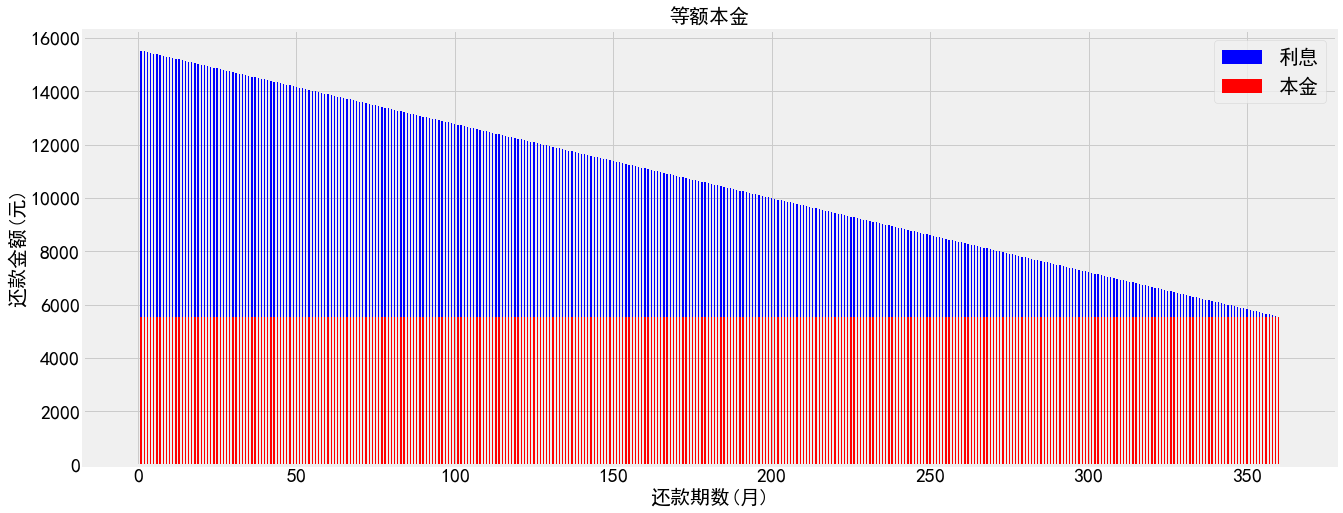

In [31]:
loan = 2000000 # 贷款金额

annualRate = 0.06 # 贷款年利率

monthRate = annualRate/12 # 贷款月利率

period = 30 # 贷款期限30年

# 每月应还本金

monthPrincipalPayment = [loan/(period*12)]*period*12

# 每月应还利息

monthInterestPayment = [(loan - loan*n/(period*12))*monthRate+loan/(period*12) for n in range(1,period*12+1)]

# 还款期数

month = [n for n in range(1,period*12+1)]

f,ax=plt.subplots(figsize=(20,8))

l1 = plt.bar(month,monthInterestPayment,color='b',width=0.4)

l2 = plt.bar(month,monthPrincipalPayment,color='r',width=0.4)

plt.xlabel(u'还款期数(月)', size=20)

# 设置y轴标签

plt.ylabel('还款金额(元)', size=20)

# 设置标题

plt.title(u'等额本金', size=20)

#刻度字体大小20

plt.tick_params(labelsize=20)

# 设置注解狂

plt.legend(handles = [l1, l2,], labels = ['利息', '本金'], loc = 'best',fontsize=20)

plt.show()

* 还款公式 

![还款公式](https://img-blog.csdnimg.cn/20200702110816655.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3l1eGluMDAwMA==,size_16,color_FFFFFF,t_70#pic_center)

In [3]:
class financeCalculator():
    def __init__(self,Corpus,numOfPeriod,Interest):
        '''3个入参：本金 / 期数 / 利率（年利率）'''
        self.Corpus = Corpus
        self.numOfPeriod = numOfPeriod
        self.Interest = Interest

    def calPayPerPeriod(self):
        '''等额本息计算每期还款额的公式'''
        r = self.Interest / 12 / 100
        return r * (1+r)**self.numOfPeriod * self.Corpus / ((1+r)**self.numOfPeriod - 1)

    def averageCorpusPlusInterest(self):
        '''计算等额本息还款计划表'''
        interestList,interestListSum,paidCorpus,paidCorpusSum,unpaidCorpus = [],[],[],[],[]
        r = self.Interest / 12 / 100
        for i in range(self.numOfPeriod):
            balance = self.Corpus - sum(paidCorpus)
            payInte = balance * r
            interestList.append(payInte)
            interestListSum.append(sum(interestList))
            payPerPeriod = self.calPayPerPeriod()
            paidCorpus.append(payPerPeriod - payInte)
            paidCorpusSum.append(sum(paidCorpus))
            unpaidCorpus.append(balance)
            
        unpaidCorpus = unpaidCorpus[1:] + [0]
        df = pd.DataFrame({'期数':list(range(1,self.numOfPeriod+1)),'月供':[payPerPeriod]*self.numOfPeriod,
                          '月供本金':paidCorpus,'月供本金累计':paidCorpusSum,'月供利息':interestList,'月供利息累计':interestListSum,'本金余额':unpaidCorpus})
        df = df.set_index('期数').round(2).reset_index()
        summary = ['总计',round(df['月供'].sum(),2),round(df['月供本金'].sum()),'--',
               round(df['月供利息'].sum(),2),'--','--']
        df = df.append(pd.Series(summary,index=df.columns),ignore_index=True)
        return df

    def averageCorpus(self):    
        '''计算等额本金还款计划表'''
        paidCorpus,paidCorpusSum,unpaidCorpus,interestList,interestListSum,payPerPeriod = [],[],[],[],[],[]
        r = self.Interest / 12 / 100
        for i in range(self.numOfPeriod):
            balance = self.Corpus - sum(paidCorpus)
            payInte = balance * r
            unpaidCorpus.append(balance)
            paidCorpus.append(self.Corpus / self.numOfPeriod)
            paidCorpusSum.append(sum(paidCorpus))
            interestList.append(payInte)
            interestListSum.append(sum(interestList))
            payPerPeriod.append(self.Corpus / self.numOfPeriod + payInte)
        unpaidCorpus = unpaidCorpus[1:] + [0]
        df = pd.DataFrame({'期数':list(range(1,self.numOfPeriod+1)),'月供':payPerPeriod,
                          '月供本金':paidCorpus,'月供本金累计':paidCorpusSum,'月供利息':interestList,'月供利息累计':interestListSum,'本金余额':unpaidCorpus})
        df = df.set_index('期数').round(2).reset_index()
        summary = ['总计',round(df['月供'].sum(),2),round(df['月供本金'].sum()),'--',
               round(df['月供利息'].sum(),2),'--','--']
        df = df.append(pd.Series(summary,index=df.columns),ignore_index=True)
        return df

In [4]:
fc = financeCalculator(300000,30*12,5.6)
#计算等额本息还款计划表
a = fc.averageCorpusPlusInterest()
a

,期数,月供,月供本金,月供本金累计,月供利息,月供利息累计,本金余额
0,1,1722.24,322.24,322.24,1400.00,1400,299678
1,2,1722.24,323.74,645.98,1398.50,2798.5,299354
2,3,1722.24,325.25,971.23,1396.99,4195.48,299029
3,4,1722.24,326.77,1298,1395.47,5590.95,298702
4,5,1722.24,328.29,1626.29,1393.94,6984.89,298374
...,...,...,...,...,...,...,...
356,357,1722.24,1690.46,294881,31.78,319957,5118.86
357,358,1722.24,1698.35,296579,23.89,319981,3420.51
358,359,1722.24,1706.27,298286,15.96,319997,1714.24
359,360,1722.24,1714.24,300000,8.00,320005,0


In [9]:
#计算等额本金还款计划表
b = fc.averageCorpus()
b

,期数,月供,月供本金,月供本金累计,月供利息,月供利息累计,本金余额
0,1,2233.33,833.33,833.33,1400.00,1400,299167
1,2,2229.44,833.33,1666.67,1396.11,2796.11,298333
2,3,2225.56,833.33,2500,1392.22,4188.33,297500
3,4,2221.67,833.33,3333.33,1388.33,5576.67,296667
4,5,2217.78,833.33,4166.67,1384.44,6961.11,295833
...,...,...,...,...,...,...,...
356,357,848.89,833.33,297500,15.56,252677,2500
357,358,845.00,833.33,298333,11.67,252688,1666.67
358,359,841.11,833.33,299167,7.78,252696,833.33
359,360,837.22,833.33,300000,3.89,252700,0


In [5]:
a.columns

Index(['期数', '月供', '月供本金', '月供本金累计', '月供利息', '月供利息累计', '本金余额'], dtype='object')

<AxesSubplot:title={'center':'等额本息还款计划'}, xlabel='月份', ylabel='还款金额'>

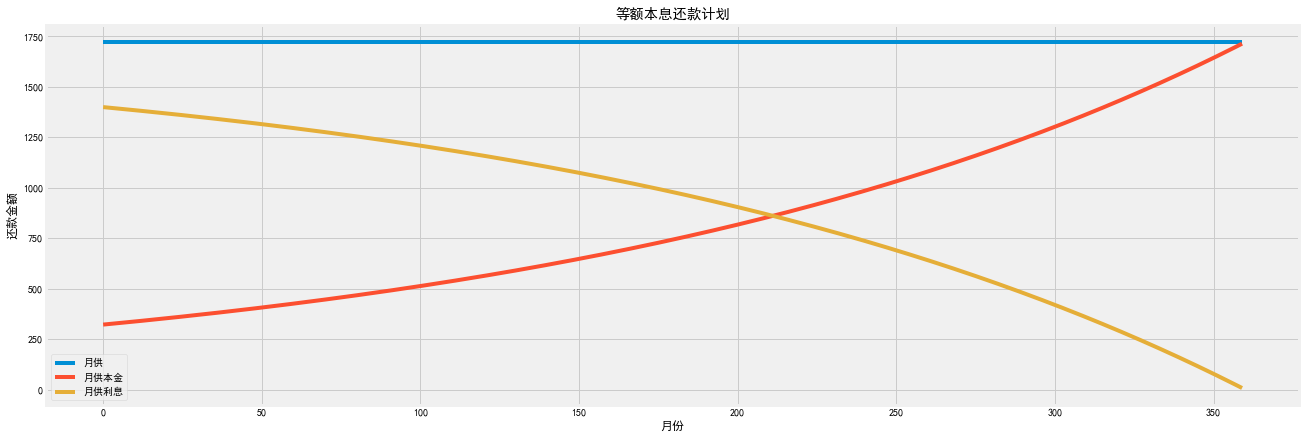

In [7]:
a[[ "月供", "月供本金", "月供利息"]][:-1].plot(title ="等额本息还款计划",ylabel="还款金额",xlabel="月份", figsize=(20,7))

In [87]:
a[-1:]

,期数,月供,月供本金,月供本金累计,月供利息,月供利息累计,本金余额
360,总计,620006.4,300000.0,--,320005.26,--,--


<AxesSubplot:title={'center':'等额本金还款计划'}, xlabel='月份', ylabel='还款金额'>

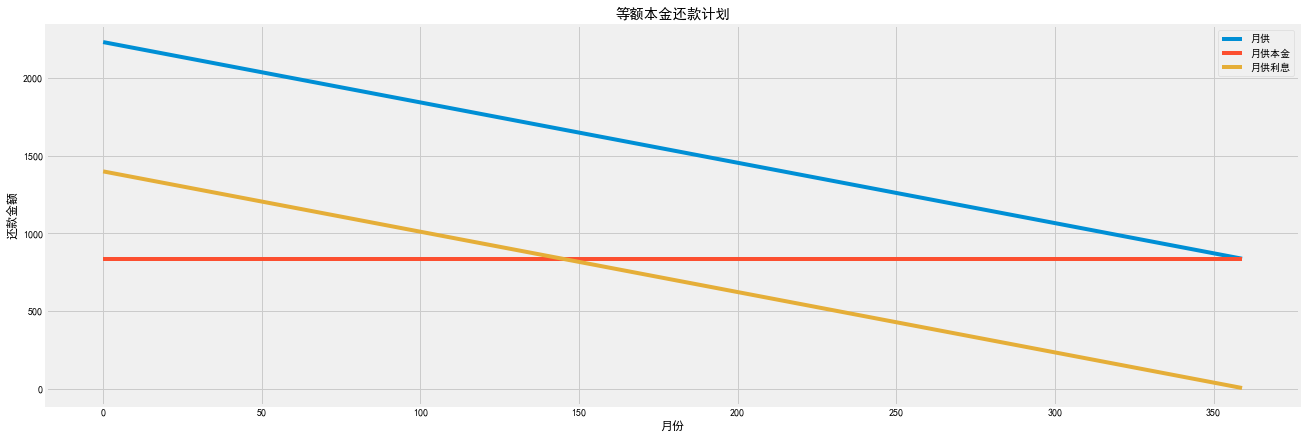

In [10]:
b[[ "月供", "月供本金", "月供利息"]][:-1].plot(title ="等额本金还款计划",ylabel="还款金额",xlabel="月份", figsize=(20,7))

In [89]:
b[-1:]

,期数,月供,月供本金,月供本金累计,月供利息,月供利息累计,本金余额
360,总计,552700.0,299999.0,--,252700.0,--,--


<AxesSubplot:title={'center':'等额本息还款计划累积'}, xlabel='月份', ylabel='还款金额'>

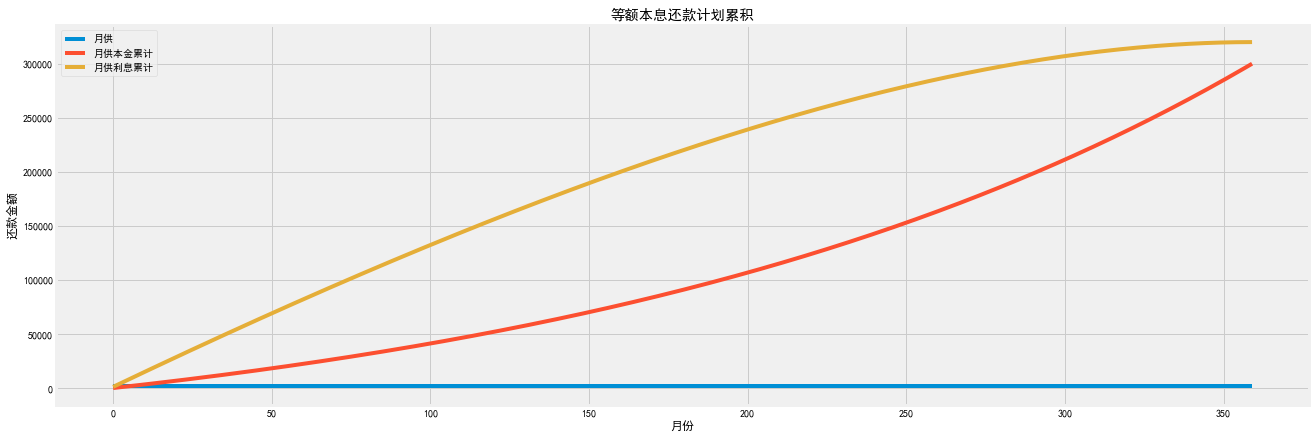

In [11]:
a[[ "月供", "月供本金累计", "月供利息累计"]][:-1].plot(title ="等额本息还款计划累积",ylabel="还款金额",xlabel="月份", figsize=(20,7))

<AxesSubplot:title={'center':'等额本金还款计划累积'}, xlabel='月份', ylabel='还款金额'>

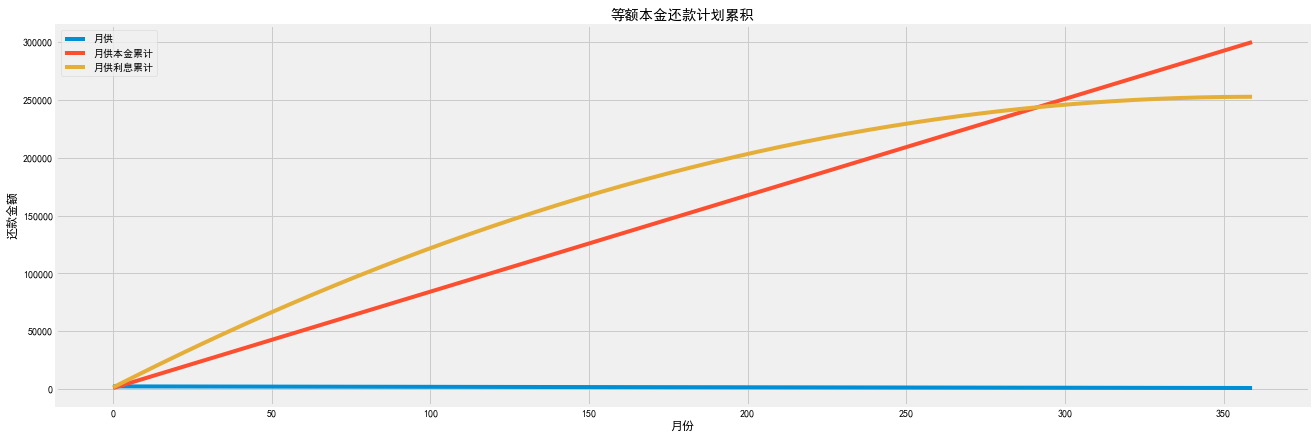

In [12]:
b[[ "月供", "月供本金累计", "月供利息累计"]][:-1].plot(title ="等额本金还款计划累积",ylabel="还款金额",xlabel="月份", figsize=(20,7))

<AxesSubplot:>

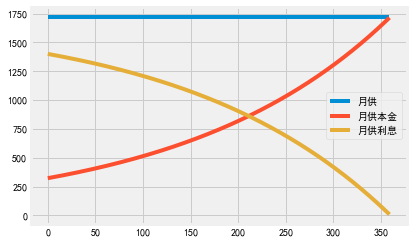

In [30]:
a.loc[:359,["月供", "月供本金", "月供利息"]].plot()